# UCS

In [19]:
# !pip install networkx
# !pip install matplotlib

In [1]:
from queue import PriorityQueue

def ucs(graph, start, goal):
    visited = set()
    queue = PriorityQueue()
    queue.put((0, [start]))  

    while queue:
        cost, path = queue.get()  
        node = path[-1]  

        if node not in visited:
            visited.add(node)

            if node == goal:
                return path, cost

            for neighbor, weight in graph.get(node, {}).items():
                if neighbor not in visited:
                    new_cost = cost + weight
                    new_path = path + [neighbor]  
                    queue.put((new_cost, new_path))  

    return None, float('inf') 

In [2]:
graph = {
    'S': {'A': 1, 'G': 12},                 # OR     ‘S’: [(‘A’,1), (‘G’,12) ],
    'A': {'B': 3, 'C': 1},                  #        ‘A’: [(‘B’,3), (‘C’,1) ],
    'B': {'D': 3},                          #        ‘B’: [(‘D’,3) ],
    'C': {'D': 1, 'G': 2},                  #        ‘C’: [(‘D’,1), (‘G’,2) ],
    'D': {'G': 3},                          #        ‘D’: [(‘G’,3) ],
    'G': {}                                 #        ‘G’: [ ]
}

start_node = 'S'
goal_node = 'G'

path, cost = ucs(graph, start_node, goal_node)

if path:
    print("Path found:", path)
    print("Cost:", cost)
else:
    print("Goal not reachable")

Path found: ['S', 'A', 'C', 'G']
Cost: 4


# BFS

In [3]:
graph = {
    'A': ['C', 'E'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['A', 'B', 'D'],
    'F': ['C'],
    'G': ['C']
}


def bfs(graph, start):
    explored = []
    queue = [start]

    while queue:

        node = queue.pop(0)   
        if node not in explored:
            explored.append(node)
            neighbours = graph[node]

            for neighbour in neighbours:
                queue.append(neighbour)
    return explored

print(bfs(graph, 'A'))  


['A', 'C', 'E', 'F', 'B', 'D', 'G']


In [4]:
def dfs(graph, start):
    explored = []
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in explored:
            explored.append(node)
            neighbours = graph[node]

            for neighbour in neighbours:
                stack.append(neighbour)
    return explored

print(dfs(graph, 'A'))

['A', 'E', 'D', 'G', 'C', 'F', 'B']


In [5]:
def bfs_shortest_path(graph, start, goal):
    explored = []
    queue = [[start]]
 
    if start == goal:
        return "That was easy! Start = goal"
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]

            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                
                if neighbour == goal:
                    return new_path
 
            explored.append(node)
     
    return "So sorry, but a connecting path doesn't exist :("
    

print(bfs_shortest_path(graph, 'A', 'G')) 

['A', 'E', 'D', 'G']


# Graph Visulaization with Cost

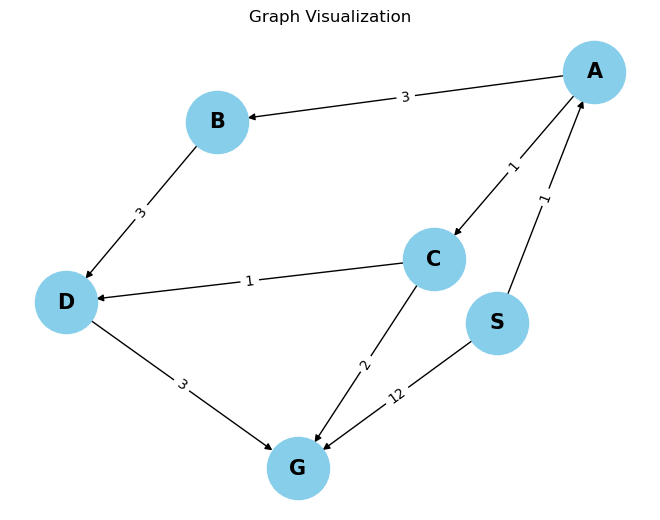

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def display_graph(graph):

    # Create a directed graph
    G = nx.DiGraph() # G = nx.Graph()

    # Add edges to the graph
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=15, font_weight="bold")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization")
    plt.show()

# Example graph
graph = {
    'S': {'A': 1, 'G': 12},
    'A': {'B': 3, 'C': 1},
    'B': {'D': 3},
    'C': {'D': 1, 'G': 2},
    'D': {'G': 3},
    'G': {}
}

# Display the graph
display_graph(graph)

# Graph Visulaization without cost

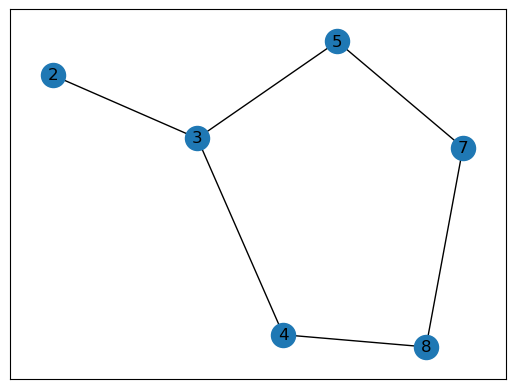

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '2': [],
    '4': ['8'],
    '7': ['8'],
    '8': []
}


G = nx.Graph(graph)
nx.draw_networkx(G)
plt.show()

# DFS

In [8]:
graph = {
    'A': ['B', 'C', 'E'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'G', 'F'],
    'D': ['B'],
    'E': ['A', 'B', 'D'],
    'F': ['C'],
    'G': ['C']
}


visited = set()
stack = []   

def dfs(visited, graph, node):
    
    if node not in visited:
        stack.append(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
    return stack


print("Following is the Depth-First Search")
print(dfs(visited, graph, 'A'))

Following is the Depth-First Search
['A', 'B', 'D', 'E', 'C', 'G', 'F']


In [9]:
def dfs_path(graph, start, goal, path=None):
    if path is None:
        path = []

    path = path + [start]

    if start == goal:
        return path

    for node in graph[start]:
        if node not in path:
            new_path = dfs_path(graph, node, goal, path)
            if new_path:
                return new_path

    return None


graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G'],
    'D': ['H'],
    'E': [],
    'F': ['I'],
    'G': [],
    'H': [],
    'I': []
}

start_node = 'A'
goal_node = 'I'
path = dfs_path(graph, start_node, goal_node)

if path:
    print(f"Path from {start_node} to {goal_node}: {path}")
else:
    print(f"No path found from {start_node} to {goal_node}")

Path from A to I: ['A', 'B', 'F', 'I']


# A star

In [10]:
def aStarAlgo(start_node, stop_node):

        open_set = set(start_node)
        closed_set = set()
        g = {} 
        parents = {}

        g[start_node] = 0
        
        parents[start_node] = start_node

        while len(open_set) > 0:
            n = None

            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v

            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                   
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
    
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                print('Path does not exist!')
                return None

            if n == stop_node:
                path = []

                while parents[n] != n:
                    path.append(n)
                    n = parents[n]

                path.append(start_node)

                path.reverse()

                print('Path found: {}'.format(path))
                return path

            open_set.remove(n)
            closed_set.add(n)

        print('Path does not exist!')
        return None

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

    
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,

        }

        return H_dist[n]

Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],

}
aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

# Maze

$$$$$$$$
$ $    $
$ $ $$ $
$    $ $
$$$$ $ $
$      $
$$$$$$$$
  ####     ##
#           #
# ####      #
# #   #     #
#       #   
#############


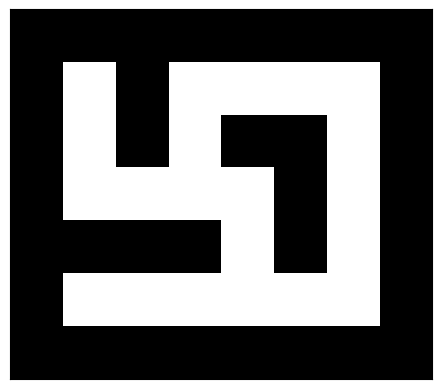

# # # # # #
# S       #
#   #   # #
#   #     #
#       E #
# # # # # #
[(1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


In [11]:
def print_maze(maze):
    for row in maze:
        print("".join([' ' if cell == 0 else '$' for cell in row]))

maze = [               
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

# Print the maze
print_maze(maze)


2. 
static_maze = [
    "  ####     ##",
    "#           #",
    "# ####      #",
    "# #   #     #",
    "#       #   ",
    "#############"
]
for row in static_maze:
    print(row)

3.
import matplotlib.pyplot as plt      
import numpy as np                   

def draw_maze(maze):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap='binary')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

draw_maze(maze)

maze = [
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 1, 1, 1]
]



from queue import Queue

def bfs(maze, start, end):
    queue = Queue()
    queue.put([start])  

    while queue:
        path = queue.get() 
        x, y = path[-1]     

        if (x, y) == end:
            return path  

        for dx, dy in [(1,0), (0,1), (-1,0), (0,-1)]:  
            next_x, next_y = x + dx, y + dy
            if maze[next_x][next_y] != '#' and (next_x, next_y) not in path:
                new_path = list(path)
                new_path.append((next_x, next_y))
                queue.put(new_path)  


maze = [
    ['#', '#', '#', '#', '#', '#'],
    ['#', 'S', ' ', ' ', ' ', '#'],
    ['#', ' ', '#', ' ', '#', '#'],
    ['#', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', ' ', ' ', 'E', '#'],
    ['#', '#', '#', '#', '#', '#']
]

def visualize_maze(maze):
    for row in maze:
        print(' '.join(row))

visualize_maze(maze)
start = (1, 1)  
end = (4, 4)   
path = bfs(maze, start, end)
print(path)

# Extra functions

In [12]:
graph = {
    'S': {'A': 1, 'G': 12},                 # OR     ‘S’: [(‘A’,1), (‘G’,12) ],
    'A': {'B': 3, 'C': 1},                  #        ‘A’: [(‘B’,3), (‘C’,1) ],
    'B': {'D': 3},                          #        ‘B’: [(‘D’,3) ],
    'C': {'D': 1, 'G': 2},                  #        ‘C’: [(‘D’,1), (‘G’,2) ],
    'D': {'G': 3},                          #        ‘D’: [(‘G’,3) ],
    'G': {}                                 #        ‘G’: [ ]
}


In [13]:
def add_node(node):
    if node not in graph:
        graph[node] = {}
    
add_node('T')

In [14]:
print(graph)

{'S': {'A': 1, 'G': 12}, 'A': {'B': 3, 'C': 1}, 'B': {'D': 3}, 'C': {'D': 1, 'G': 2}, 'D': {'G': 3}, 'G': {}, 'T': {}}


In [15]:
def add_edge(node1, node2, value):
    if node2 not in graph[node1]:
        graph[node1][node2] = value
    
add_edge('T', 'A', 6)

In [16]:
print(graph)

{'S': {'A': 1, 'G': 12}, 'A': {'B': 3, 'C': 1}, 'B': {'D': 3}, 'C': {'D': 1, 'G': 2}, 'D': {'G': 3}, 'G': {}, 'T': {'A': 6}}


In [17]:
def minimax(node, depth, maximizingPlayer):
    if depth == 0 or node is a terminal node:
        return the heuristic value of the node
    if maximizingPlayer:
        bestValue = -infinity
        for each child node of node:
            v = minimax(child, depth - 1, FALSE)
            bestValue = max(bestValue, v)
        return bestValue
    else:
        bestValue = +infinity
        for each child node of node:
            v = minimax(child, depth - 1, TRUE)
            bestValue = min(bestValue, v)
        return bestValue

SyntaxError: invalid syntax (3094646172.py, line 2)